In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import f_regression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Download latest version
data_path = kagglehub.dataset_download("gregorut/videogamesales") + "/vgsales.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(data_path)

In [71]:
# Display the first few rows of the DataFrame
print(df.head())

# Display the last few rows of the DataFrame
print(df.tail())

# Display the shape of the DataFrame
print(df.shape)

# Display the data types of the columns
print(df.dtypes)

# Display the summary statistics of the DataFrame
print(df.describe())

# Display the number of missing values in each column
print(df.isnull().sum())

# Display the number of unique values in each column
print(df.nunique())

# Display the number of duplicated rows in the DataFrame
print(df.duplicated().sum())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
        Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597   

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


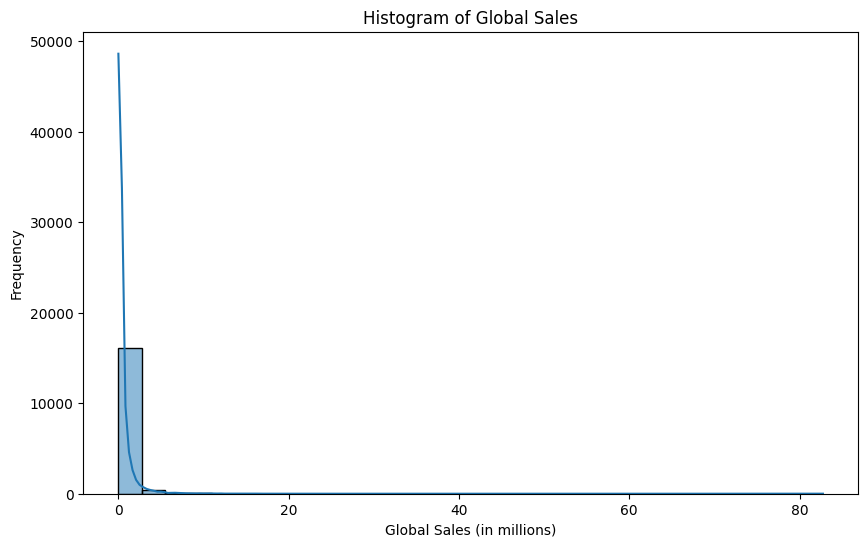

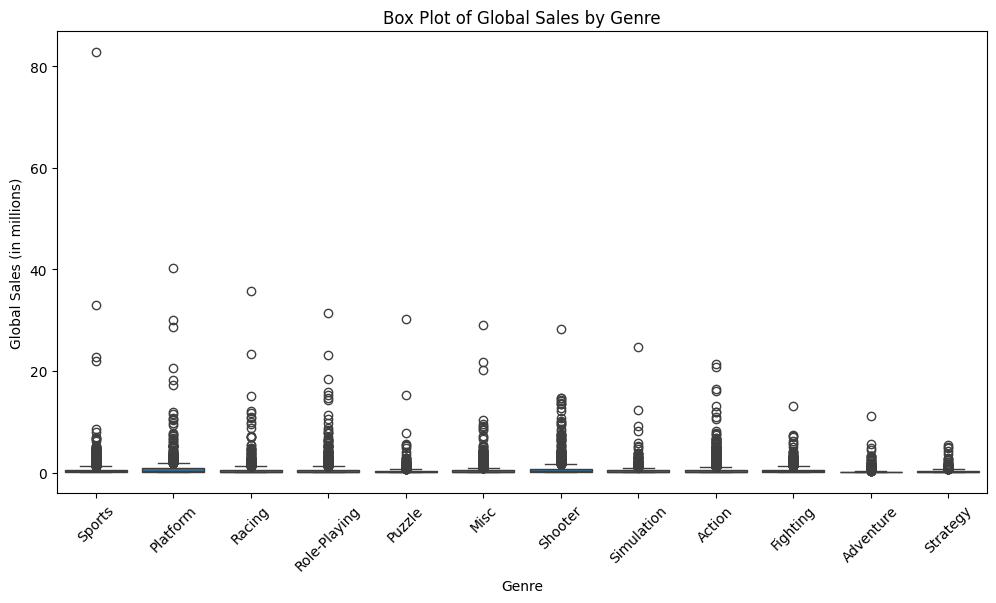

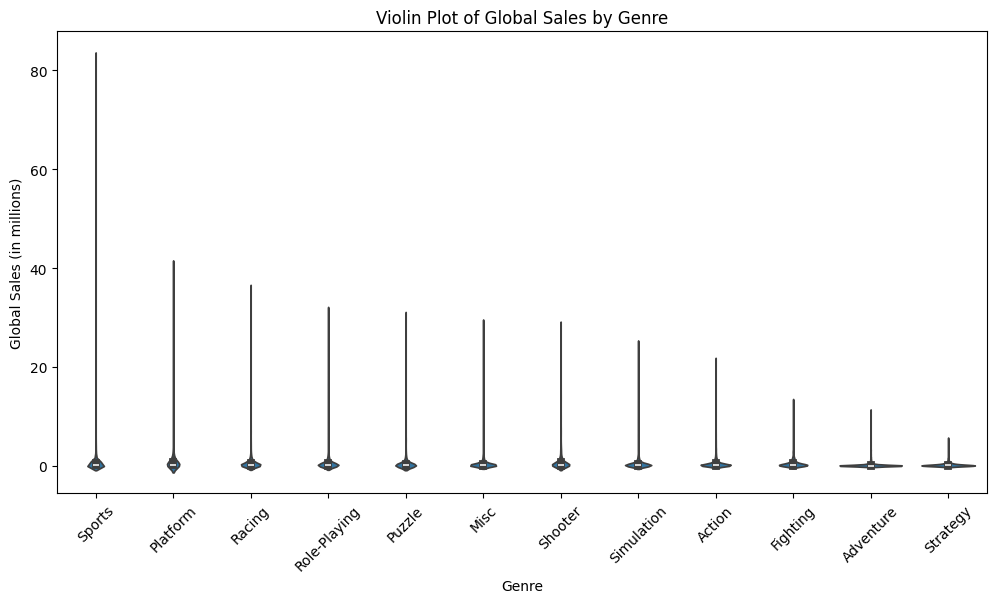

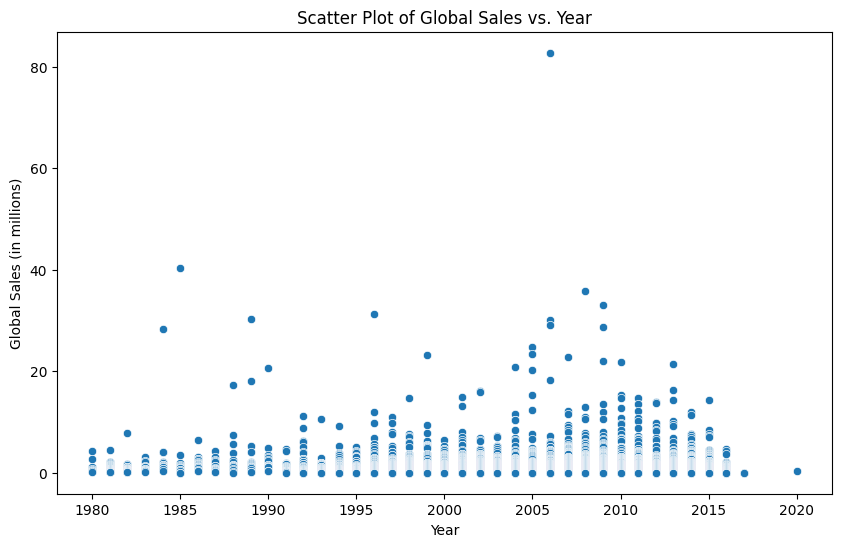

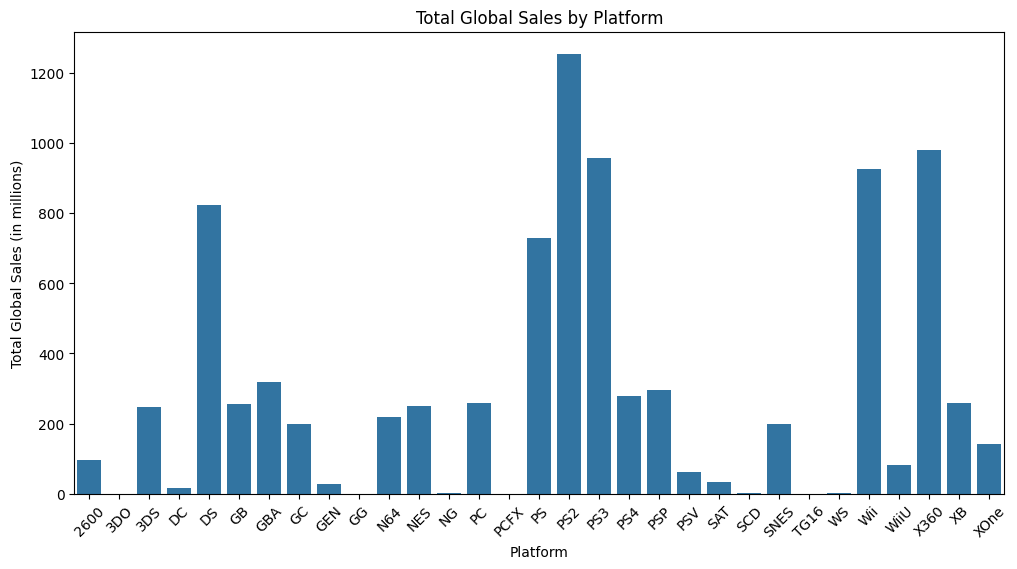

In [72]:
# Download latest version
data_path = kagglehub.dataset_download("gregorut/videogamesales") + "/vgsales.csv"

# Load the CSV file into a DataFrame
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
print(df.head())

# Histogram of Global Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Global_Sales'], bins=30, kde=True)
plt.title('Histogram of Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Frequency')
plt.show()

# Box Plot of Global Sales by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Global_Sales', data=df)
plt.title('Box Plot of Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Violin Plot of Global Sales by Genre
plt.figure(figsize=(12, 6))
sns.violinplot(x='Genre', y='Global_Sales', data=df)
plt.title('Violin Plot of Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot of Global Sales vs. Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Global_Sales', data=df)
plt.title('Scatter Plot of Global Sales vs. Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

# Bar Plot of Total Sales by Platform
plt.figure(figsize=(12, 6))
platform_sales = df.groupby('Platform')['Global_Sales'].sum().reset_index()
sns.barplot(x='Platform', y='Global_Sales', data=platform_sales)
plt.title('Total Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

In [73]:
df_num = df.copy()

# Label encode the 'Platform' column
label_encoder = LabelEncoder()
df_num['Platform'] = label_encoder.fit_transform(df['Platform'])
df_num['Genre'] = label_encoder.fit_transform(df['Genre'])
df_num['Publisher'] = label_encoder.fit_transform(df['Publisher'])

# Drop the 'Name' column
df_num.drop(columns=['Name'], inplace=True)

# Display the first few rows of the DataFrame after encoding
print("\nDataFrame after Label Encoding:")
print(df_num.head())


DataFrame after Label Encoding:
   Rank  Platform    Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     1        26  2006.0     10        359     41.49     29.02      3.77   
1     2        11  1985.0      4        359     29.08      3.58      6.81   
2     3        26  2008.0      6        359     15.85     12.88      3.79   
3     4        26  2009.0     10        359     15.75     11.01      3.28   
4     5         5  1996.0      7        359     11.27      8.89     10.22   

   Other_Sales  Global_Sales  
0         8.46         82.74  
1         0.77         40.24  
2         3.31         35.82  
3         2.96         33.00  
4         1.00         31.37  


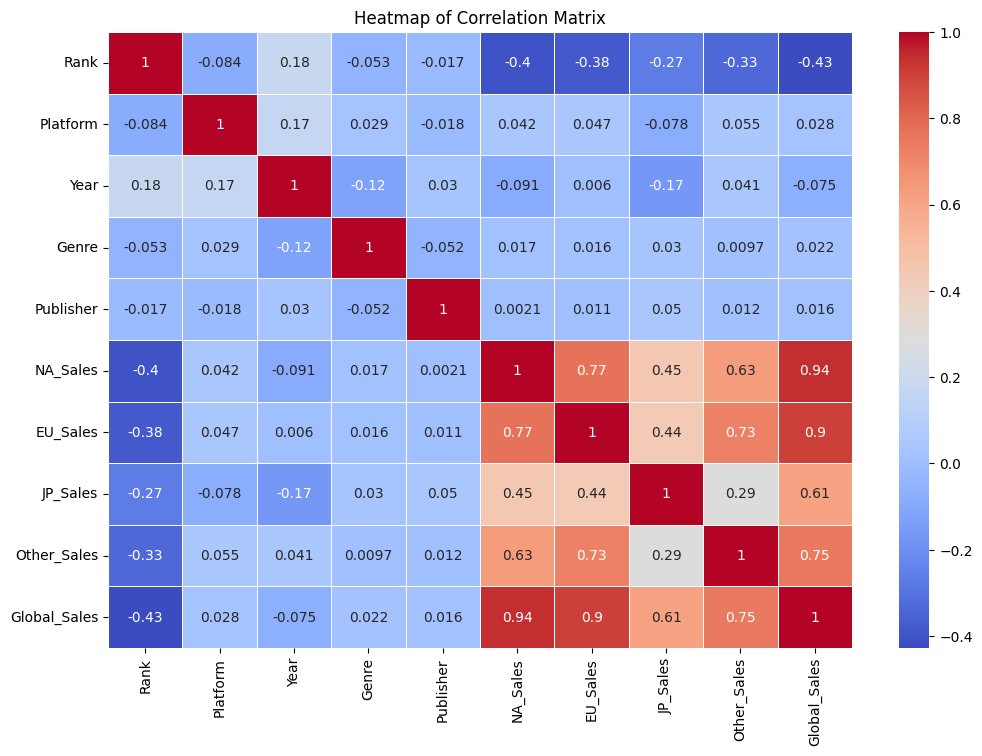

In [74]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

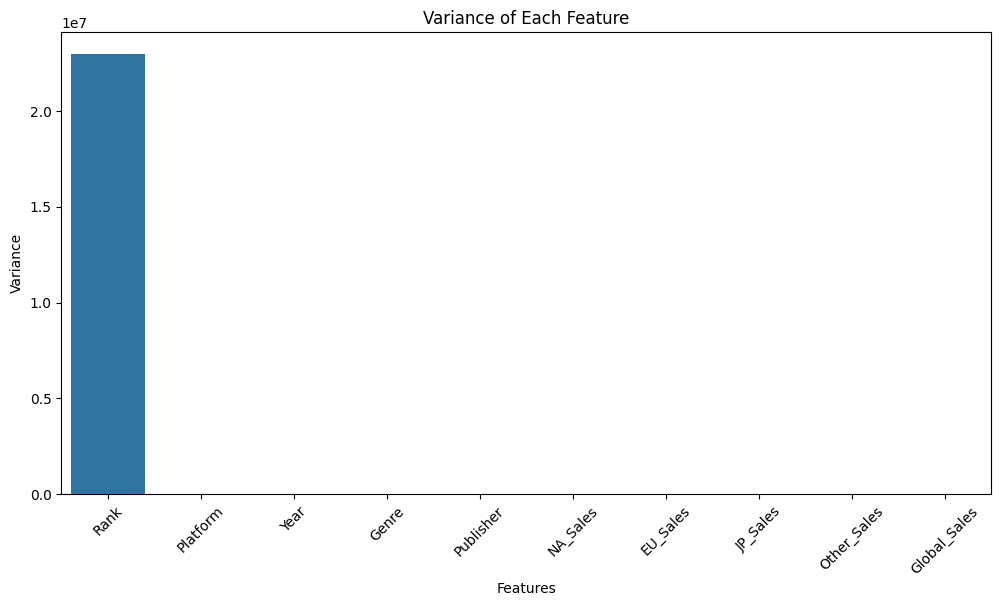

In [75]:
# Calculate the variance of each column
variances = df_num.var()

# Plot the variance
plt.figure(figsize=(12, 6))
sns.barplot(x=variances.index, y=variances.values)
plt.xlabel('Features')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')
plt.xticks(rotation=45)
plt.show()

In [76]:
# Forward and backward fill the missing values
df = df.ffill()
df = df.bfill()

In [77]:
# Create a copy of the DataFrame for numerical encoding
df_num = df.copy()

# Label encode the 'Platform', 'Genre', and 'Publisher' columns
label_encoder = LabelEncoder()
df_num['Platform'] = label_encoder.fit_transform(df['Platform'])
df_num['Genre'] = label_encoder.fit_transform(df['Genre'])
df_num['Publisher'] = label_encoder.fit_transform(df['Publisher'])

In [78]:
# Drop the 'Name' column
df_num.drop(columns=['Name'], inplace=True)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_num['Cluster'] = kmeans.fit_predict(df_num)

In [79]:
# Display the first few rows of the DataFrame with cluster labels
print("\nDataFrame with Cluster Labels:")
print(df_num.head())


DataFrame with Cluster Labels:
   Rank  Platform    Year  Genre  Publisher  NA_Sales  EU_Sales  JP_Sales  \
0     1        26  2006.0     10        359     41.49     29.02      3.77   
1     2        11  1985.0      4        359     29.08      3.58      6.81   
2     3        26  2008.0      6        359     15.85     12.88      3.79   
3     4        26  2009.0     10        359     15.75     11.01      3.28   
4     5         5  1996.0      7        359     11.27      8.89     10.22   

   Other_Sales  Global_Sales  Cluster  
0         8.46         82.74        2  
1         0.77         40.24        2  
2         3.31         35.82        2  
3         2.96         33.00        2  
4         1.00         31.37        2  


In [80]:
# Perform PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_num.drop(columns=['Cluster']))
pca_df = pd.DataFrame(data=pca_components, columns=['pca1', 'pca2'])
pca_df['Cluster'] = df_num['Cluster']

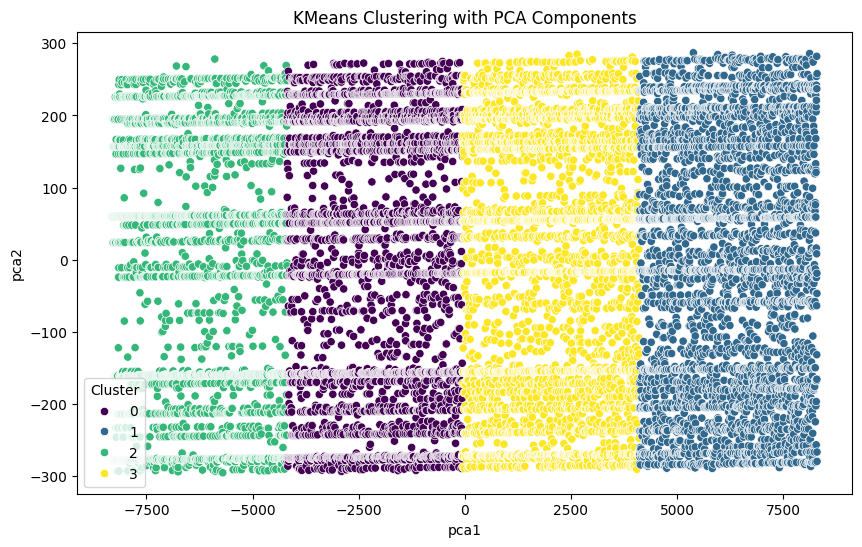

In [81]:
# Plot the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clustering with PCA Components')
plt.show()

# Classification Neural Network

Fairly low amount of losses but requires a larger output sizes if we want to predict more rankings. This approach has limited scalability. We will try regression neural network next.

```python
Epoch [100/100], Loss: 8.7682
```


In [82]:
# Prepare features and target
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']
X = df[features].values

# Use LabelEncoder to ensure proper ranking labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Rank'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.LongTensor(y_test)

# Define the Neural Network
class GameRankingPredictor(nn.Module):
    def __init__(self, input_size, num_classes):
        super(GameRankingPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, num_classes)
        )
    
    def forward(self, x):
        return self.network(x)

# Determine number of unique classes
num_classes = len(np.unique(y))

# Instantiate the model
model = GameRankingPredictor(input_size=len(features), num_classes=num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, X_train, y_train, criterion, optimizer, epochs=100):
    model.train()
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print loss every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Train the model
train_model(model, X_train_tensor, y_train_tensor, criterion, optimizer)

# Evaluation
def evaluate_model(model, X_test, y_test):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == y_test).float().mean()
        print(f'Test Accuracy: {accuracy.item():.2%}')
        return predicted

# Predict and evaluate
predictions = evaluate_model(model, X_test_tensor, y_test_tensor)

# Function to predict rank for a new game
def predict_game_rank(model, game_data, scaler, label_encoder):
    # Prepare and scale the input
    game_tensor = torch.FloatTensor(scaler.transform(game_data.reshape(1, -1)))
    
    # Get prediction
    model.eval()
    with torch.no_grad():
        output = model(game_tensor)
        _, predicted_label = torch.max(output, 1)
        predicted_rank = label_encoder.inverse_transform(predicted_label.numpy())
    
    return predicted_rank[0]

# Example: Predicting rank for a hypothetical new game
new_game_features = np.array([20.0, 15.0, 5.0, 2.0, 42.0, 2010.0])
predicted_rank = predict_game_rank(model, new_game_features, scaler, label_encoder)
print(f"Predicted Rank for New Game: {predicted_rank}")

# # Print original and encoded ranks for reference
# print("\nOriginal Ranks:")
# print(df[['Name', 'Rank']])
# print("\nEncoded Ranks:")
# for original, encoded in zip(df['Rank'], y):
#     print(f"Original: {original}, Encoded: {encoded}")

Epoch [10/100], Loss: 9.7153
Epoch [20/100], Loss: 9.6961
Epoch [30/100], Loss: 9.6648
Epoch [40/100], Loss: 9.6097
Epoch [50/100], Loss: 9.5136
Epoch [60/100], Loss: 9.3856
Epoch [70/100], Loss: 9.2364
Epoch [80/100], Loss: 9.0878
Epoch [90/100], Loss: 8.9282
Epoch [100/100], Loss: 8.7948
Test Accuracy: 0.00%
Predicted Rank for New Game: 5


# Regression Neural Network without Feature Selection

High loss and high mean absolute error.

```python
Training Loss: 92026328.0000
Validation Loss: 90543288.0000
Mean Absolute Error: 8239.3281
```


In [ ]:
# Data Preprocessing
def preprocess_data(df):
    # Select relevant features
    features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']
    
    # Create a copy of the dataframe
    processed_df = df.copy()
    
    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    
    # Select features
    X = processed_df[features].values
    
    # Impute missing values
    X = imputer.fit_transform(X)
    
    # Normalize features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Prepare target (Rank)
    y = processed_df['Rank'].values
    
    return X_scaled, y, scaler

# Prepare the data
X_scaled, y, scaler = preprocess_data(df)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Advanced Neural Network for Regression
class RankPredictor(nn.Module):
    def __init__(self, input_size):
        super(RankPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.network(x)

# Instantiate the model
model = RankPredictor(input_size=X_train.shape[1])

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, epochs=200):
    # Move tensors to appropriate device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)
    
    # Training mode
    model.train()
    
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Validation
        if (epoch + 1) % 200 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_test)
                val_loss = criterion(val_outputs, y_test)
                
                # Calculate Mean Absolute Error
                mae = torch.mean(torch.abs(val_outputs - y_test))
                
                print(f'Epoch [{epoch+1}/{epochs}]')
                print(f'Training Loss: {loss.item():.4f}')
                print(f'Validation Loss: {val_loss.item():.4f}')
                print(f'Mean Absolute Error: {mae.item():.4f}\n')
            
            model.train()

# Train the model
train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, criterion, optimizer)

# Prediction function
def predict_game_rank(model, game_data, scaler):
    # Prepare and scale the input
    game_scaled = scaler.transform(game_data.reshape(1, -1))
    game_tensor = torch.FloatTensor(game_scaled)
    
    # Get prediction
    model.eval()
    with torch.no_grad():
        predicted_rank = model(game_tensor)
    
    return predicted_rank.item()

# Example prediction
new_game_features = np.array([20.0, 15.0, 5.0, 2.0, 42.0, 2010.0])
predicted_rank = predict_game_rank(model, new_game_features, scaler)
print(f"Predicted Rank for New Game: {predicted_rank}")

# Additional model evaluation
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    # Calculate R-squared (coefficient of determination)
    ss_total = torch.sum((y_test_tensor - torch.mean(y_test_tensor)) ** 2)
    ss_residual = torch.sum((y_test_tensor - test_predictions) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f"R-squared: {r_squared.item():.4f}")

Predicted Rank for New Game: -16.449216842651367
R-squared: -2.9864


# Regression Neural Network with Feature Selection

Low loss and low mean absolute error.

```python
Train Loss: 0.0014
Validation Loss: 0.0007

Mean Squared Error: 0.0016
Mean Absolute Error: 0.0280
```


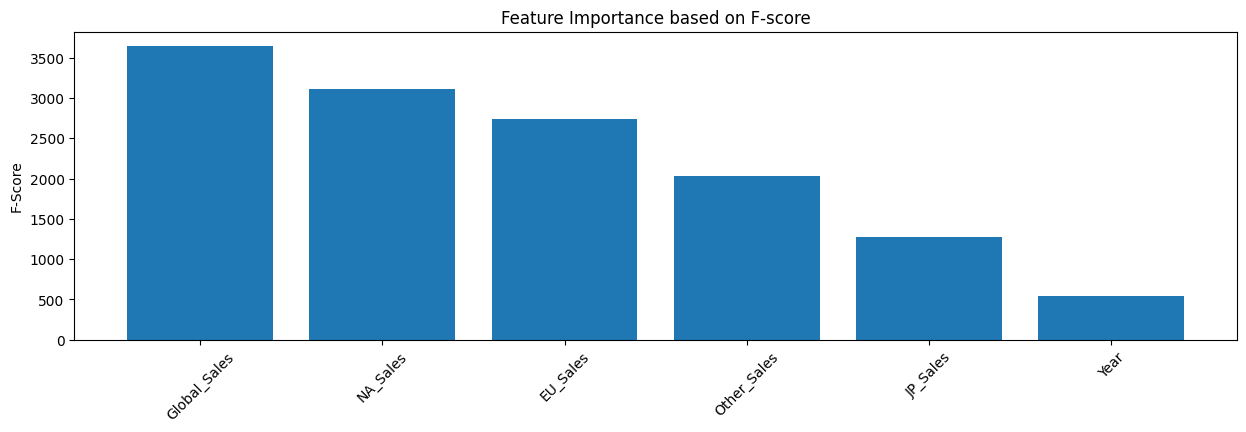

Feature Importance:
        feature      f_score
0  Global_Sales  3637.736170
1      NA_Sales  3115.605091
2      EU_Sales  2738.666217
3   Other_Sales  2029.459076
4      JP_Sales  1274.847943
5          Year   539.221993


/Users/jamievuong/Library/Python/3.9/lib/python/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


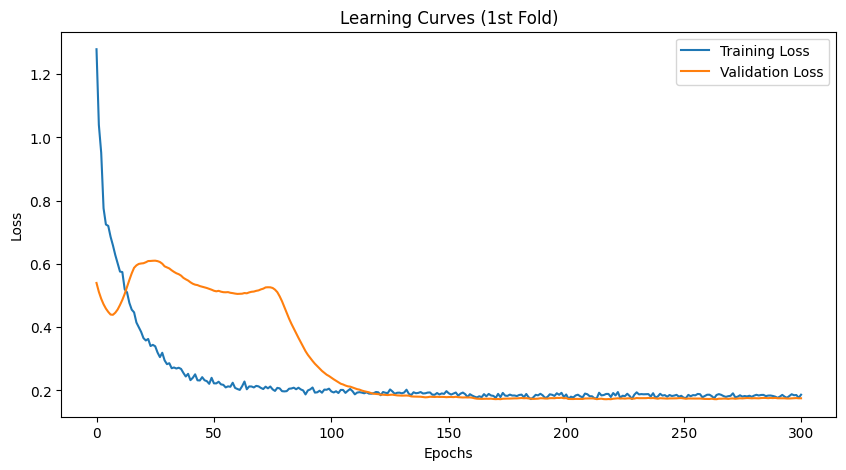

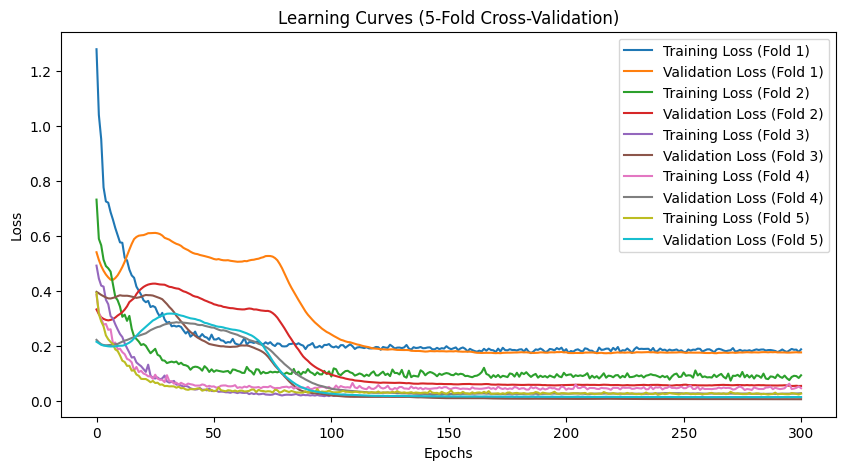

Train Loss: 0.1866
Validation Loss: 0.1753


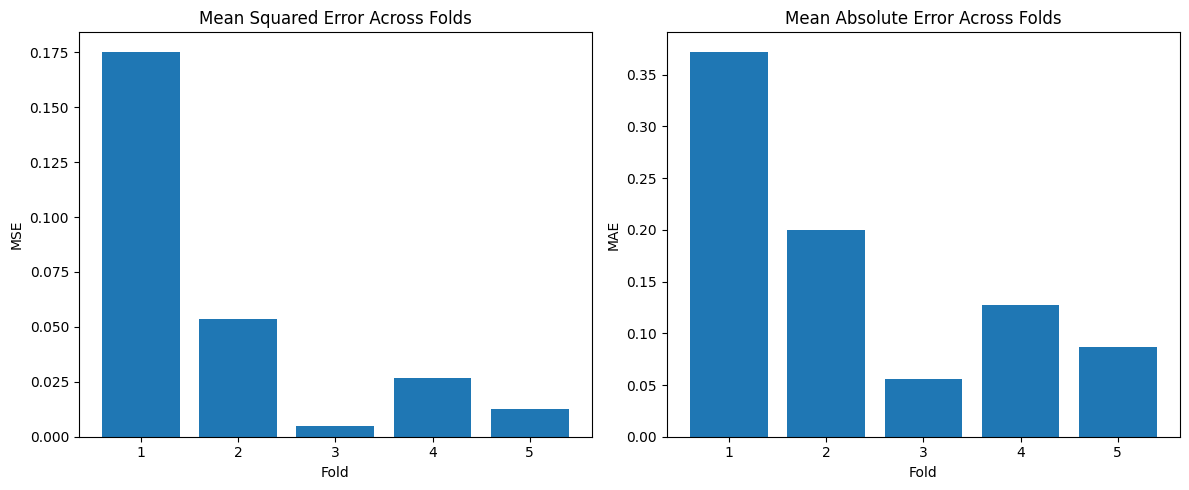

Mean Squared Error: 0.0128
Mean Absolute Error: 0.0867

Prediction Details:
Sample Game Features: [82.74 41.49 29.02]
Predicted Rank: -70370.69871044159
Actual Rank: 1


In [84]:
# Comprehensive data preprocessing
def preprocess_data(df):
    # Select relevant features
    features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']
    target = 'Rank'

    # Download latest version
    data_path = kagglehub.dataset_download("gregorut/videogamesales") + "/vgsales.csv"

    # Load the CSV file into a DataFrame
    df = pd.read_csv(data_path)
    
    # Remove rows with missing critical data
    df_cleaned = df.dropna(subset=features + [target])
    
    # Extract features and target
    X = df_cleaned[features].values
    y = df_cleaned[target].values
    
    # Perform feature importance analysis
    f_scores, _ = f_regression(X, y)
    feature_importance = pd.DataFrame({
        'feature': features,
        'f_score': f_scores
    }).sort_values('f_score', ascending=False).reset_index(drop=True)
    
    # Plot the feature importance
    plt.figure(figsize=(15, 4))
    plt.bar(feature_importance['feature'], feature_importance['f_score'])
    plt.title('Feature Importance based on F-score')
    plt.xticks(rotation=45)
    plt.ylabel('F-Score')
    plt.show()

    print("Feature Importance:")
    print(feature_importance)

    # Select most important features
    top_features = feature_importance['feature'].head(3).tolist()
    X = df_cleaned[top_features].values

    # Scale features
    feature_scaler = MinMaxScaler()
    X_scaled = feature_scaler.fit_transform(X)
    
    # For the target, use a different approach
    # Instead of scaling, we'll normalize relative to the dataset
    y_min = y.min()
    y_max = y.max()
    y_normalized = (y - y_min) / (y_max - y_min)
    
    return X_scaled, y_normalized, feature_scaler, y_min, y_max

# Advanced Neural Network with Residual Connections
# ... (code for ResidualBlock and RankPredictor models remains the same)

# Training and evaluation function with 5-fold cross-validation
def train_and_evaluate(X, y, random_state=42):
    # Initialize 5-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=random_state)
    
    # Initialize lists to store losses
    train_losses = []
    val_losses = []
    mse_scores = []
    mae_scores = []
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X), 1):
        # Split the data for the current fold
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]
        
        # Convert to tensors
        X_train_tensor = torch.FloatTensor(X_train)
        y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
        X_val_tensor = torch.FloatTensor(X_val)
        y_val_tensor = torch.FloatTensor(y_val).unsqueeze(1)
        
        # Initialize model, loss, and optimizer
        model = RankPredictor(input_size=X_train.shape[1])
        criterion = nn.MSELoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
        
        # Learning rate scheduler
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer, 'min', patience=10, factor=0.5, verbose=True
        )
        
        # Training loop with detailed logging
        fold_train_losses = []
        fold_val_losses = []
        
        for epoch in range(301):
            # Training phase
            model.train()
            optimizer.zero_grad()
            train_outputs = model(X_train_tensor)
            train_loss = criterion(train_outputs, y_train_tensor)
            train_loss.backward()
            optimizer.step()
            
            # Validation phase
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val_tensor)
                val_loss = criterion(val_outputs, y_val_tensor)
            
            # Learning rate scheduling
            scheduler.step(val_loss)
            
            # Store losses
            fold_train_losses.append(train_loss.item())
            fold_val_losses.append(val_loss.item())

        # Append fold-specific losses to the overall lists
        train_losses.append(fold_train_losses)
        val_losses.append(fold_val_losses)
        
        # Model evaluation (use the last fold)
        model.eval()
        with torch.no_grad():
            predictions = model(X_val_tensor)
            mse = torch.nn.functional.mse_loss(predictions, y_val_tensor)
            mae = torch.mean(torch.abs(predictions - y_val_tensor))
            mse_scores.append(mse.item())
            mae_scores.append(mae.item())
        

    # Visualize learning curves
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses[0], label='Training Loss')
    plt.plot(val_losses[0], label='Validation Loss')
    plt.title('Learning Curves (1st Fold)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Visualize learning curves
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.plot(train_losses[i], label=f'Training Loss (Fold {i+1})')
        plt.plot(val_losses[i], label=f'Validation Loss (Fold {i+1})')
    plt.title('Learning Curves (5-Fold Cross-Validation)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    print(f'Train Loss: {train_losses[0][-1]:.4f}')
    print(f'Validation Loss: {val_losses[0][-1]:.4f}')

    # Plotting MSE and MAE across folds
    plt.figure(figsize=(12, 5))
    
    # MSE Plot
    plt.subplot(1, 2, 1)
    plt.bar(range(1, 6), mse_scores)
    plt.title('Mean Squared Error Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('MSE')
    plt.xticks(range(1, 6))
    
    # MAE Plot
    plt.subplot(1, 2, 2)
    plt.bar(range(1, 6), mae_scores)
    plt.title('Mean Absolute Error Across Folds')
    plt.xlabel('Fold')
    plt.ylabel('MAE')
    plt.xticks(range(1, 6))
    
    plt.tight_layout()
    plt.show()

    print(f'Mean Squared Error: {mse_scores[-1]:.4f}')
    print(f'Mean Absolute Error: {mae_scores[-1]:.4f}')

    return model

# Main execution
# Preprocess data
X_scaled, y_normalized, feature_scaler, y_min, y_max = preprocess_data(df)

# Train and evaluate the model using 5-fold cross-validation
best_model = train_and_evaluate(X_scaled, y_normalized)

# Prediction function (unchanged)
def predict_game_rank(model, game_data, feature_scaler, y_min, y_max):
    # Scale the input features
    game_scaled = feature_scaler.transform(game_data.reshape(1, -1))
    game_tensor = torch.FloatTensor(game_scaled)
    
    model.eval()
    with torch.no_grad():
        # Get normalized prediction
        predicted_normalized = model(game_tensor).item()
        
        # Denormalize to original rank scale
        predicted_rank = predicted_normalized * (y_max - y_min) + y_min
    
    return predicted_rank

# Example prediction (unchanged)
sample_game = df[['Global_Sales', 'NA_Sales', 'EU_Sales']].iloc[0].values
predicted_rank = predict_game_rank(best_model, sample_game, feature_scaler, y_min, y_max)

print("\nPrediction Details:")
print(f"Sample Game Features: {sample_game}")
print(f"Predicted Rank: {predicted_rank}")
print(f"Actual Rank: {df.iloc[0]['Rank']}")